In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [248]:
user_df = pd.read_csv("takehome_users.csv", encoding='latin-1')

In [249]:
user_engagement_df = pd.read_csv("takehome_user_engagement.csv")
user_engagement_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [250]:
user_engagement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


No nulls. User_id, and visited are the right type. Change time_stamp

In [251]:
user_engagement_df['time_stamp'] = pd.to_datetime(user_engagement_df['time_stamp'])
user_engagement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


We care about the counts per week for a given user.

In [252]:
new_engagement_df = user_engagement_df.set_index(['user_id', 'time_stamp']).sort_index()
new_engagement_df.head()

visited
user_id time_stamp                  
1       2014-04-22 03:53:30        1
2       2013-11-15 03:45:04        1
        2013-11-29 03:45:04        1
        2013-12-09 03:45:04        1
        2013-12-25 03:45:04        1

Now we want the sum of the weekly visits per week per user. Thus we need to resample the time stamp to weekly, and then aggregate weekly tallies but also group it by user. The following code does that:

In [253]:
new_engagement_df2 = new_engagement_df.groupby([pd.Grouper(level='user_id'), pd.Grouper(freq='W', level='time_stamp')]).sum()

In [254]:
new_engagement_df2[new_engagement_df2['visited'] >= 3].head()

visited
user_id time_stamp         
2       2014-02-09        3
10      2013-03-03        3
        2013-04-14        3
        2013-04-28        3
        2013-05-05        4

OK this is looking good so far. Now, a user is consider engaged if during the entire observed period there was at least 1 week where they used the product 3 or more times. The following encodes this information for each user with 1 = engaged, 0 = not engaged.

In [255]:
user_engaged = ( (new_engagement_df2['visited'] >= 3).groupby('user_id').sum() >= 1 ).astype('int')

In [256]:
print(user_engaged.head())
print(user_engaged.unique())

user_id
1    0
2    1
3    0
4    0
5    0
Name: visited, dtype: int32
[0 1]


In [257]:
engaged_df = pd.DataFrame(user_engaged).reset_index()
engaged_df.head(3)

,user_id,visited
0,1,0
1,2,1
2,3,0


In [258]:
engaged_df = engaged_df.rename(columns = {'visited': 'engaged'})
engaged_df.head()

,user_id,engaged
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0


In [259]:
engaged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8823 entries, 0 to 8822
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_id  8823 non-null   int64
 1   engaged  8823 non-null   int32
dtypes: int32(1), int64(1)
memory usage: 103.5 KB


Now, we have the user info. Let's take a look at that:

In [260]:
user_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [261]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


object_id is the user_id. There may be users here that are not in our user engagement data so let's merge the two dataframes on a inner join.

In [262]:
tot_user_engaged_df = pd.merge(user_df, engaged_df, left_on = "object_id", right_on = "user_id", how = "inner"  )
tot_user_engaged_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,engaged
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,3,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,4,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,5,0


In [263]:
tot_user_engaged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   8823 non-null   int64  
 1   creation_time               8823 non-null   object 
 2   name                        8823 non-null   object 
 3   email                       8823 non-null   object 
 4   creation_source             8823 non-null   object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    8823 non-null   int64  
 7   enabled_for_marketing_drip  8823 non-null   int64  
 8   org_id                      8823 non-null   int64  
 9   invited_by_user_id          4776 non-null   float64
 10  user_id                     8823 non-null   int64  
 11  engaged                     8823 non-null   int32  
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 861.6+ KB


Alright, now I can't imagine that someone's email address or their name will correlate with whether they are engaged or not. Let's drop these and the redundant object_id and set the index to the user_id:

In [264]:
tot_user_engaged_df = tot_user_engaged_df.drop(columns = ['name', 'email', 'object_id']).set_index('user_id')

In [265]:
tot_user_engaged_df.head()

,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,engaged
user_id,,,,,,,,
1,2014-04-22 03:53:30,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
2,2013-11-15 03:45:04,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
3,2013-03-19 23:14:52,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
4,2013-05-21 08:09:28,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
5,2013-01-17 10:14:20,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [266]:
tot_user_engaged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 1 to 12000
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_time               8823 non-null   object 
 1   creation_source             8823 non-null   object 
 2   last_session_creation_time  8823 non-null   float64
 3   opted_in_to_mailing_list    8823 non-null   int64  
 4   enabled_for_marketing_drip  8823 non-null   int64  
 5   org_id                      8823 non-null   int64  
 6   invited_by_user_id          4776 non-null   float64
 7   engaged                     8823 non-null   int32  
dtypes: float64(2), int32(1), int64(3), object(2)
memory usage: 585.9+ KB


There are only NaNs in the invited_by_user_id. Again, I'm guessing that NaNs here mean that they were not invited by another user. I'm also going to make an assumption that it doesn't matter which user they were invited by and that it only matters whether they were invited by another user or not. This is reasonable and also collapses this categorical space from 2230 unique values to a Boolean. 

In [267]:
len(tot_user_engaged_df['invited_by_user_id'].unique())

2230

In [268]:
tot_user_engaged_df['invited_by_user'] = tot_user_engaged_df['invited_by_user_id'].notna().astype('int')

In [269]:
tot_user_engaged_df = tot_user_engaged_df.drop(columns = ['invited_by_user_id'])

In [270]:
tot_user_engaged_df.head()

,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,engaged,invited_by_user
user_id,,,,,,,,
1,2014-04-22 03:53:30,GUEST_INVITE,1.398139e+09,1,0,11,0,1
2,2013-11-15 03:45:04,ORG_INVITE,1.396238e+09,0,0,1,1,1
3,2013-03-19 23:14:52,ORG_INVITE,1.363735e+09,0,0,94,0,1
4,2013-05-21 08:09:28,GUEST_INVITE,1.369210e+09,0,0,1,0,1
5,2013-01-17 10:14:20,GUEST_INVITE,1.358850e+09,0,0,193,0,1


creation_source is a categorical. We are going to one-hot encode and remove one of the columns to avoid problems with multicollinearity.

In [271]:
len(tot_user_engaged_df['creation_source'].unique())

5

In [272]:
tot_user_engaged_df = tot_user_engaged_df.join(pd.get_dummies(tot_user_engaged_df['creation_source'], drop_first= True ))
tot_user_engaged_df.head()

,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,engaged,invited_by_user,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
user_id,,,,,,,,,,,,
1,2014-04-22 03:53:30,GUEST_INVITE,1.398139e+09,1,0,11,0,1,0,0,0,0
2,2013-11-15 03:45:04,ORG_INVITE,1.396238e+09,0,0,1,1,1,1,0,0,0
3,2013-03-19 23:14:52,ORG_INVITE,1.363735e+09,0,0,94,0,1,1,0,0,0
4,2013-05-21 08:09:28,GUEST_INVITE,1.369210e+09,0,0,1,0,1,0,0,0,0
5,2013-01-17 10:14:20,GUEST_INVITE,1.358850e+09,0,0,193,0,1,0,0,0,0


Let's deal with the creation time

In [273]:
tot_user_engaged_df['creation_time'] = pd.to_datetime(tot_user_engaged_df['creation_time'])

In [274]:
tot_user_engaged_df['creation_time'].head()

user_id
1   2014-04-22 03:53:30
2   2013-11-15 03:45:04
3   2013-03-19 23:14:52
4   2013-05-21 08:09:28
5   2013-01-17 10:14:20
Name: creation_time, dtype: datetime64[ns]

Alright, I'm going to assume that the relevant info is in month and day. The year might inded affect things, but if this is a predictive model then the creation year doesn't help for projection on new user data.

In [275]:
tot_user_engaged_df['creation_month'] = tot_user_engaged_df['creation_time'].dt.month
tot_user_engaged_df['creation_day'] = tot_user_engaged_df['creation_time'].dt.day


In [276]:
tot_user_engaged_df = tot_user_engaged_df.drop(columns = ['creation_time'])

In [277]:
tot_user_engaged_df.head()

,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,engaged,invited_by_user,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,creation_month,creation_day
user_id,,,,,,,,,,,,,
1,GUEST_INVITE,1.398139e+09,1,0,11,0,1,0,0,0,0,4,22
2,ORG_INVITE,1.396238e+09,0,0,1,1,1,1,0,0,0,11,15
3,ORG_INVITE,1.363735e+09,0,0,94,0,1,1,0,0,0,3,19
4,GUEST_INVITE,1.369210e+09,0,0,1,0,1,0,0,0,0,5,21
5,GUEST_INVITE,1.358850e+09,0,0,193,0,1,0,0,0,0,1,17


Alright, the last thing we need to think about is the org_id. It's a categorical:

In [278]:
len(tot_user_engaged_df['org_id'].unique())

417

That's way too many features to one-hot encode...and I want to avoid dimensionality reduction techniques for interpretability's sake.

In [279]:
org_count = tot_user_engaged_df.groupby('org_id').count().rename(columns={'creation_source': 'count'})['count']
org_count.head()

org_id
0    228
1    172
2    150
3    125
4    122
Name: count, dtype: int64

<AxesSubplot:xlabel='org_id'>

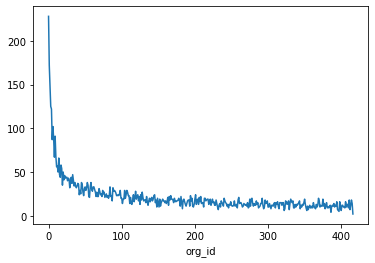

In [280]:
sns.lineplot(x = org_count.index, y = org_count.values)

Based on this plot im going to split this into two >50 and <50...approximately where the knee is. > 50 implies the org has a large presence in our system and < 50 means it has a small presence.

In [281]:
(org_count > 50).replace({True: 'large_presence', False: 'small_presence'})

org_id
0      large_presence
1      large_presence
2      large_presence
3      large_presence
4      large_presence
            ...      
412    small_presence
413    small_presence
414    small_presence
415    small_presence
416    small_presence
Name: count, Length: 417, dtype: object

In [282]:
# convert this to a dict and then we'll use this as a replacement rule.
org_replacer = (org_count > 50).replace({True: 'large_presence', False: 'small_presence'}).to_dict()
org_replacer[0]

'large_presence'

In [283]:
tot_user_engaged_df['org_id'] =tot_user_engaged_df['org_id'].replace(org_replacer)

In [284]:
tot_user_engaged_df.head()

,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,engaged,invited_by_user,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,creation_month,creation_day
user_id,,,,,,,,,,,,,
1,GUEST_INVITE,1.398139e+09,1,0,large_presence,0,1,0,0,0,0,4,22
2,ORG_INVITE,1.396238e+09,0,0,large_presence,1,1,1,0,0,0,11,15
3,ORG_INVITE,1.363735e+09,0,0,small_presence,0,1,1,0,0,0,3,19
4,GUEST_INVITE,1.369210e+09,0,0,large_presence,0,1,0,0,0,0,5,21
5,GUEST_INVITE,1.358850e+09,0,0,small_presence,0,1,0,0,0,0,1,17


In [285]:
tot_user_engaged_df.rename(columns = {'org_id': 'org_presence'}, inplace=True)

In [286]:
tot_user_engaged_df.head(1)

,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_presence,engaged,invited_by_user,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,creation_month,creation_day
user_id,,,,,,,,,,,,,
1,GUEST_INVITE,1.398139e+09,1,0,large_presence,0,1,0,0,0,0,4,22


OK I think we are done for now. We'll later drop some of the columns for modelling but let's keep them all in for EDA

## II. Statistical EDA

<AxesSubplot:>

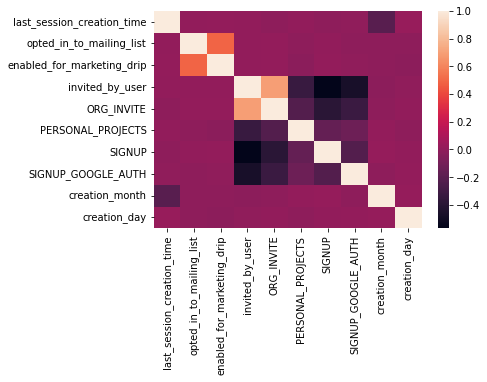

In [289]:
sns.heatmap(tot_user_engaged_df.drop(columns = ['engaged', 'creation_source', 'org_presence']).corr())

There are some correlations here: 

- those who opted in to the mailing list also were like to be enabled for marketing drip. 
- the org_invite and invited_by_user are correlated -- which make sense.
- signup and signup-google_auth are strongly anticorrelted with being invited by another user. OK.
- creation month is mildly anti-correlated with last_session_time


<AxesSubplot:xlabel='engaged', ylabel='count'>

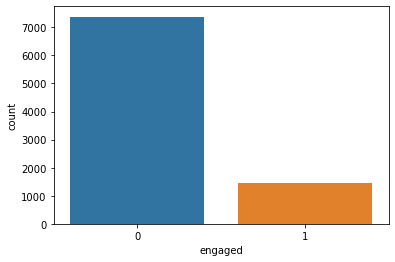

In [87]:
sns.countplot(x = 'engaged', data = tot_user_engaged_df)

The take-away here is that this is an imbalanced dataset. We will have to be careful about what we put into our classifier and the validation techniques we use. 

<AxesSubplot:xlabel='creation_source', ylabel='count'>

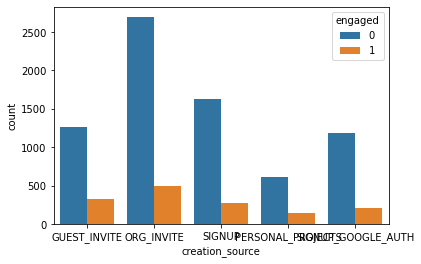

In [290]:
sns.countplot(x = 'creation_source', hue = 'engaged', data = tot_user_engaged_df)

The imbalance is high here. Maybe it's better to plot this differently.

In [291]:
tot_user_engaged_df.columns

Index(['creation_source', 'last_session_creation_time',
       'opted_in_to_mailing_list', 'enabled_for_marketing_drip',
       'org_presence', 'engaged', 'invited_by_user', 'ORG_INVITE',
       'PERSONAL_PROJECTS', 'SIGNUP', 'SIGNUP_GOOGLE_AUTH', 'creation_month',
       'creation_day'],
      dtype='object')

In [294]:
cols_to_plot = ['ORG_INVITE','PERSONAL_PROJECTS', 'SIGNUP', 'SIGNUP_GOOGLE_AUTH', 'engaged']
combined = tot_user_engaged_df[cols_to_plot].groupby('engaged').sum()


,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
engaged,,,,
0,2697.0,617.0,1623.0,1179.0
1,491.0,147.0,275.0,206.0


for each type of signup gets the ratio of those who were engaged to those who were not.

In [303]:
ratio_data = combined.loc[1]/combined.loc[0]
ratio_data

ORG_INVITE            0.182054
PERSONAL_PROJECTS     0.238250
SIGNUP                0.169439
SIGNUP_GOOGLE_AUTH    0.174724
dtype: float64

Text(0.5, 0, 'creation_group')

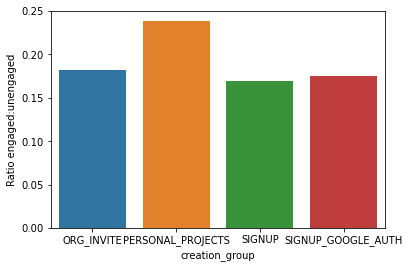

In [305]:
sns.barplot(x = ratio_data.index, y = ratio_data.values)
plt.ylabel("Ratio engaged:unengaged")
plt.xlabel('creation_group')

Seems there there is a bit more engagement from those who signed up for personal projects than the rest.

While there are few numbers in personal projects, the relative number of those who were  

<AxesSubplot:xlabel='invited_by_user', ylabel='Count'>

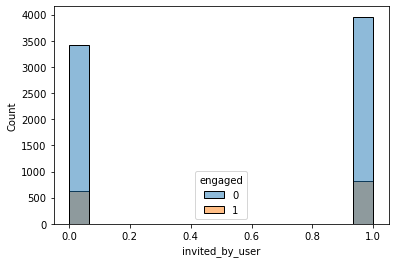

In [246]:
sns.histplot(x = 'invited_by_user', hue = 'engaged', data = tot_user_engaged_df)

Huh...not clear that this affects anything very much either.

<AxesSubplot:xlabel='org_presence', ylabel='Count'>

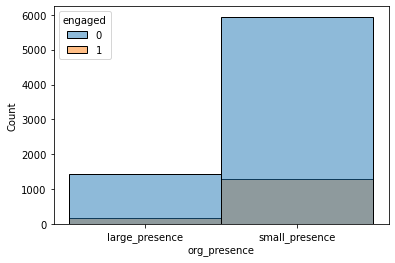

In [306]:
sns.histplot(x = 'org_presence', hue = 'engaged', data = tot_user_engaged_df)

Hmmm...there might be a difference here.

<AxesSubplot:xlabel='creation_day', ylabel='Count'>

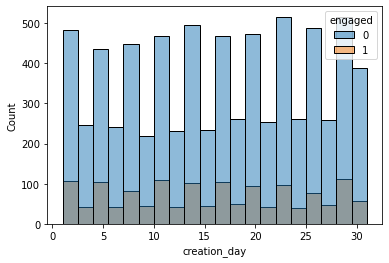

In [243]:
sns.histplot(x = 'creation_day', hue = 'engaged', data = tot_user_engaged_df)

Seems more like alternation in activity than any substantial changes or trends w.r.t engagement vs the day of the month they signed up on.

<AxesSubplot:xlabel='creation_month', ylabel='Proportion'>

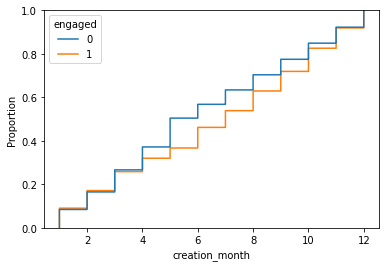

In [245]:
sns.ecdfplot(x = 'creation_month', hue = 'engaged', data = tot_user_engaged_df)

There's really no set of months that really stand out here either. I don't expect either the month or the day of account creation to matter too much then.

<AxesSubplot:xlabel='last_session_creation_time', ylabel='Count'>

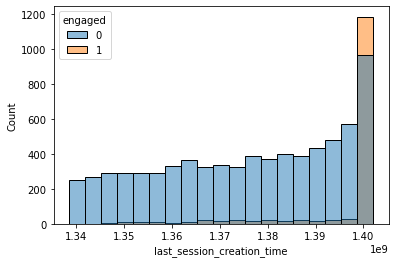

In [380]:
sns.histplot(x = 'last_session_creation_time', hue = 'engaged', data = tot_user_engaged_df)

Well...there we go. While its not the only factor, it's pretty clear that if someone is engaged it is very likely their last login was very recent. This is pretty common sense.

I'm going to go to the preprocessing/modeling part for now:

## Preprocessing/Modeling

In [309]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

In [311]:
tot_user_engaged_df.head()

,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_presence,engaged,invited_by_user,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,creation_month,creation_day
user_id,,,,,,,,,,,,,
1,GUEST_INVITE,1.398139e+09,1,0,large_presence,0,1,0,0,0,0,4,22
2,ORG_INVITE,1.396238e+09,0,0,large_presence,1,1,1,0,0,0,11,15
3,ORG_INVITE,1.363735e+09,0,0,small_presence,0,1,1,0,0,0,3,19
4,GUEST_INVITE,1.369210e+09,0,0,large_presence,0,1,0,0,0,0,5,21
5,GUEST_INVITE,1.358850e+09,0,0,small_presence,0,1,0,0,0,0,1,17


In [312]:
# drop every categorical variable not one hot encoded. convert org_presence to binary 0, 1

In [313]:
tot_user_engaged_df = tot_user_engaged_df.drop(columns = ['creation_source'])


In [317]:
# converts org presence to a boolean. 1 = large presence.
tot_user_engaged_df['org_presence']= (tot_user_engaged_df['org_presence'] == 'large_presence').astype('int')

In [319]:
tot_user_engaged_df.head(3)

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_presence,engaged,invited_by_user,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,creation_month,creation_day
user_id,,,,,,,,,,,,
1,1.398139e+09,1,0,1,0,1,0,0,0,0,4,22
2,1.396238e+09,0,0,1,1,1,1,0,0,0,11,15
3,1.363735e+09,0,0,0,0,1,1,0,0,0,3,19


In [320]:
y = tot_user_engaged_df['engaged']
X = tot_user_engaged_df.drop(columns = ['engaged'])

NOW BEFORE WE DO ANYTHING ELSE: split into train and test sets. 

In [330]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify = y, random_state = 42 )

Now, remember that we have an imbalance problem. We have a choice of upsampling with replacement or downsampling. Let's upsample. It was important to split the set first before doing this or you would definitely get leakage. There's also another problem which is that if we want to do cross validation, we need a way of handling the testing on folds w/o leakage. An external package call imblearn will work best here. They have a pipeline object built just for this purpose.

In [349]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [342]:

model = Pipeline([
        ('sampling', SMOTE()),
        ('rfc', (RandomForestClassifier()))
    ])

In [351]:
parameters = {'rfc__n_estimators': np.arange(20,140,30), 'rfc__max_depth': np.arange(3,12,3), 'rfc__max_features':  np.arange(2,8,2)}

cv = GridSearchCV(model, param_grid= parameters, cv = 5, scoring = 'roc_auc')

In [352]:
cv.fit(X_train, y_train) 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sampling', SMOTE()),
                                       ('rfc', RandomForestClassifier())]),
             param_grid={'rfc__max_depth': array([3, 6, 9]),
                         'rfc__max_features': array([2, 4, 6]),
                         'rfc__n_estimators': array([ 20,  50,  80, 110])},
             scoring='roc_auc')

In [353]:
cv.best_estimator_

Pipeline(steps=[('sampling', SMOTE()),
                ('rfc',
                 RandomForestClassifier(max_depth=9, max_features=6,
                                        n_estimators=80))])

In [354]:
cv.best_score_

0.9471278691840105

In [355]:
best_mod = cv.best_estimator_

In [361]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report

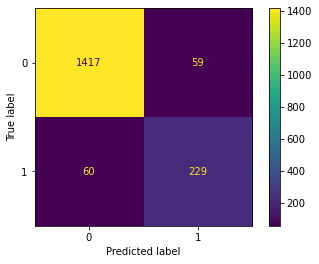

In [358]:
plot_confusion_matrix(best_mod, X_test, y_test)

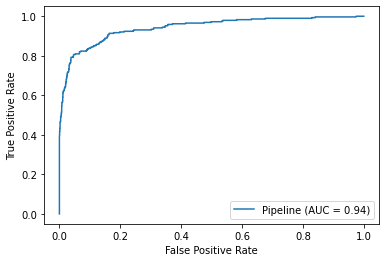

In [366]:
plot_roc_curve(best_mod, X_test, y_test)

In [368]:
y_pred = best_mod.predict(X_test)

In [369]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1476
           1       0.80      0.79      0.79       289

    accuracy                           0.93      1765
   macro avg       0.88      0.88      0.88      1765
weighted avg       0.93      0.93      0.93      1765



In [376]:
feature_names = X.columns
feat_imp_series = pd.Series(best_mod['rfc'].feature_importances_, index = feature_names).sort_values(ascending = False)

In [377]:
feat_imp_series

last_session_creation_time    0.661645
creation_month                0.080173
invited_by_user               0.044769
SIGNUP_GOOGLE_AUTH            0.039450
PERSONAL_PROJECTS             0.037227
org_presence                  0.036181
SIGNUP                        0.029978
ORG_INVITE                    0.028693
creation_day                  0.027862
opted_in_to_mailing_list      0.010788
enabled_for_marketing_drip    0.003234
dtype: float64

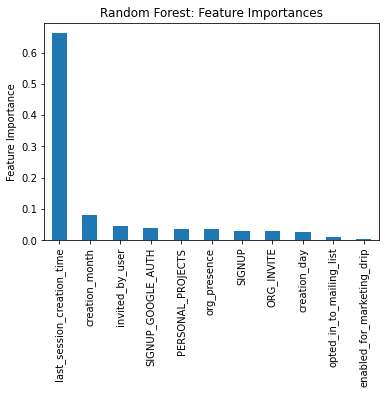

In [379]:
feat_imp_series.plot(kind = 'bar')
plt.ylabel('Feature Importance')
plt.title('Random Forest: Feature Importances')
plt.savefig('feat_imp.jpg', dpi = 300, bbox_inches = 'tight')
plt.show()